In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import gaussian_kde

In [2]:
nsc = pd.read_csv("Scored Data With Games/nsc_scored_with_games.csv", parse_dates=["Post Date", "Game Date"],
                 dtype={
                     "id": "string",
                     "Title": "string",
                     "Content": "string",
                     "Author": "string",
                     "Comp": "string",
                     "Round": "string",
                     "Venue": "string",
                     "Result": "string"
                 })
nsc["Post Date"] = pd.to_datetime(nsc["Post Date"]).dt.date
nsc["Game Date"] = pd.to_datetime(nsc["Game Date"]).dt.date
nsc.tail()

,id,Title,Content,Author,Post Date,team performance,coaching and management,stadium atmosphere,stadium amenities,pricing,...,Comp,Round,Venue,Result,Score,Opponent,xG,xGA,Attendance,Percent
1109,17s5yif,2023 end-of-season fan survey [OC],<NA>,speedwaysoccerpod,2023-11-10,-0.61,-0.50,0.00,0.00,0.00,...,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
1110,17x7oyy,Homecoming Kit Sale,Adidas has a huge markdown on this in their Bl...,SportsSpectacular,2023-11-17,NaN,NaN,NaN,0.45,0.82,...,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
1111,17xk4ov,D.C. United hires Nashville SC’s Ally Mackay a...,<NA>,pasoud,2023-11-17,NaN,0.17,NaN,NaN,NaN,...,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
1112,183py9a,Hany Mukhtar is making the case that he is mor...,<NA>,ottersaregreat10,2023-11-25,-0.89,NaN,0.23,NaN,NaN,...,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
1113,1840b9u,ISO Matchday Posters,Hello! I am looking to buy matchday posters fr...,beanerwiener8,2023-11-26,NaN,NaN,NaN,NaN,NaN,...,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
preds = pd.read_csv("Scored Data With Games/preds_scored_with_games.csv", parse_dates=["Post Date", "Game Date"],
                 dtype={
                     "id": "string",
                     "Title": "string",
                     "Content": "string",
                     "Author": "string",
                     "Venue": "string",
                     "Result": "string"
                 })
preds["Post Date"] = pd.to_datetime(preds["Post Date"]).dt.date
preds["Game Date"] = pd.to_datetime(preds["Game Date"]).dt.date
preds.tail()

,id,Title,Content,Author,Post Date,team performance,coaching and management,stadium atmosphere,stadium amenities,pricing,media coverage,miscellaneous,Game Date,Venue,Score,Opponent,Result,Attendance,Percent
933,183omt4,Who is the Preds biggest rival right now?,Was thinking about it this week. Over our team...,ConBurgundy15,2023-11-25,0.00,0.02,-0.05,0.08,NaN,0.04,0.16,NaT,<NA>,NaN,NaN,<NA>,NaN,NaN
934,183v1a6,Has anybody ever bought this? I need to know,https://nashvillelockerroom.com/life-size-gnas...,ZeldaTheOuchMouse,2023-11-25,NaN,NaN,NaN,0.00,-0.10,NaN,NaN,NaT,<NA>,NaN,NaN,<NA>,NaN,NaN
935,1844ldg,Keep an eye on Svechkov,"Folks, keep an eye on Svechkov. Several of the...",TwinTowersJenga,2023-11-26,0.34,0.18,0.06,NaN,NaN,NaN,NaN,NaT,<NA>,NaN,NaN,<NA>,NaN,NaN
936,184btbo,Customized Reverse Retro Jersey,Hey everyone! Wife and I are going to the Jet...,Austinopril,2023-11-26,NaN,NaN,NaN,0.25,-0.03,NaN,NaN,NaT,<NA>,NaN,NaN,<NA>,NaN,NaN
937,184ezp4,Juuse always starts slow,<NA>,Over-One-8,2023-11-26,-0.36,-0.24,NaN,NaN,NaN,NaN,0.17,NaT,<NA>,NaN,NaN,<NA>,NaN,NaN


In [4]:
titans = pd.read_csv("Scored Data With Games/titans_scored_with_games.csv", parse_dates=["Post Date", "Game Date"],
                 dtype={
                     "id": "string",
                     "Title": "string",
                     "Content": "string",
                     "Author": "string",
                     "Venue": "string",
                     "Result": "string"
                 })
titans["Post Date"] = pd.to_datetime(titans["Post Date"]).dt.date
titans["Game Date"] = pd.to_datetime(titans["Game Date"]).dt.date
titans.tail()

,id,Title,Content,Author,Post Date,team performance,coaching and management,stadium atmosphere,stadium amenities,pricing,media coverage,miscellaneous,Game Date,Result,Venue,Score,Opponent,Attendance,Percent
1511,183wmqw,[Dianna Russini] “Sorry Buckeyes. You can cros...,<NA>,derrick22henry,2023-11-25,-0.10,-0.03,NaN,NaN,NaN,-0.15,NaN,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN
1512,18494ao,Lions Fan Coming In Peace With a Random Questi...,Some of us were discussing this during the Mic...,MichiganMedium,2023-11-26,0.35,-0.15,-0.28,0.07,NaN,0.09,0.00,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN
1513,184dchi,Hellman’s added a last minute stop to their ga...,No kidding. They added this stop Friday. That’...,FilledUpTinCup,2023-11-26,NaN,NaN,NaN,NaN,NaN,NaN,0.21,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN
1514,184e5iq,Gobble Hill says gobble gobble up!,<NA>,Toastfrom2069,2023-11-26,NaN,NaN,NaN,NaN,NaN,NaN,-0.28,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN
1515,184exhx,Can Mods Please Change the Sub desktop Pic,It's Burks catching a pass vs the Bengals in a...,JustStrolling_,2023-11-26,NaN,NaN,NaN,NaN,NaN,NaN,0.03,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN


## General Sentiment Comparison

In [5]:
team_dfs = [nsc, preds, titans]
team_df_names = ["NSC", "Predators", "Titans"]
aspects = ["team performance", "coaching and management", "stadium atmosphere", "stadium amenities", "pricing", "media coverage", "miscellaneous"]
colors = ["#EBEC39", "#FFB81D", "#4B92DB"]

In [17]:
nsc.loc[:, aspects].mean()

team performance           0.065731
coaching and management   -0.034714
stadium atmosphere         0.169196
stadium amenities          0.128197
pricing                   -0.068333
media coverage             0.008203
miscellaneous              0.120743
dtype: float64

In [10]:
nsc.loc[:,aspects].std()

team performance           0.396787
coaching and management    0.301469
stadium atmosphere         0.344642
stadium amenities          0.280752
pricing                    0.291982
media coverage             0.353390
miscellaneous              0.316114
dtype: float64

In [11]:
preds.loc[:, aspects].mean()

team performance           0.060180
coaching and management    0.062801
stadium atmosphere         0.161046
stadium amenities          0.108652
pricing                   -0.025371
media coverage            -0.014083
miscellaneous              0.134692
dtype: float64

In [12]:
preds.loc[:,aspects].std()

team performance           0.361663
coaching and management    0.287326
stadium atmosphere         0.338522
stadium amenities          0.276521
pricing                    0.267412
media coverage             0.274127
miscellaneous              0.283982
dtype: float64

In [14]:
titans.loc[:, aspects].mean()

team performance          -0.036687
coaching and management   -0.035443
stadium atmosphere         0.077941
stadium amenities          0.077087
pricing                   -0.014492
media coverage            -0.022029
miscellaneous              0.074053
dtype: float64

In [15]:
titans.loc[:,aspects].std()

team performance           0.305740
coaching and management    0.246391
stadium atmosphere         0.264540
stadium amenities          0.254587
pricing                    0.209936
media coverage             0.176625
miscellaneous              0.251670
dtype: float64

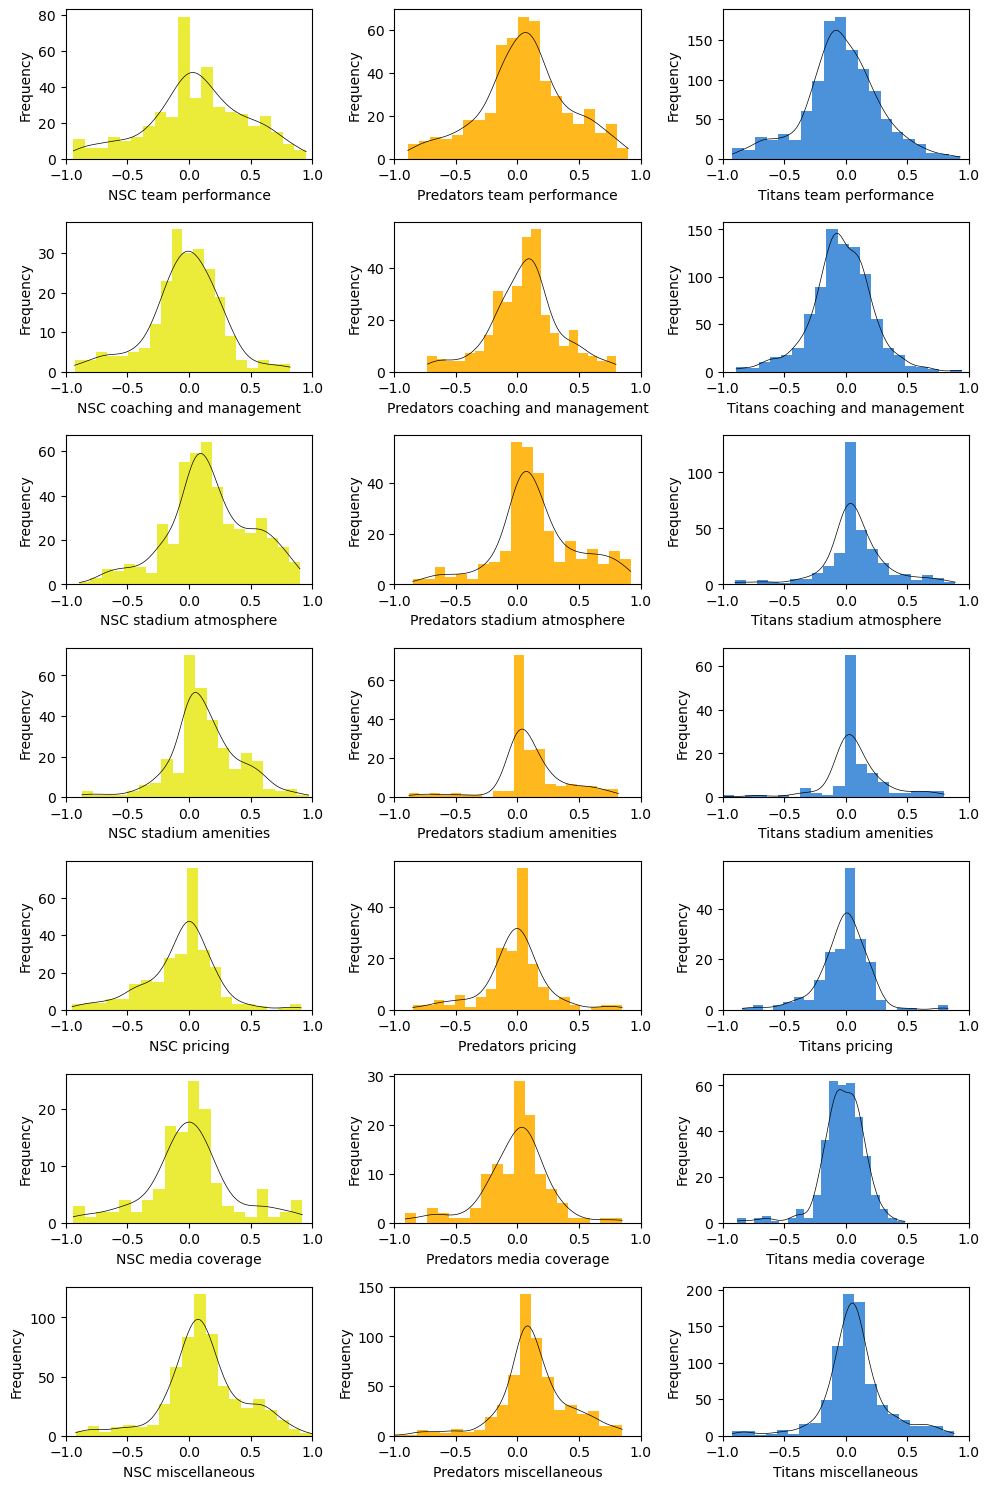

In [47]:
num_aspects = len(aspects)
num_teams = 3

fig, axs = plt.subplots(num_aspects, num_teams, figsize=(10, 15))

for i, df in enumerate(team_dfs):
    for j in range(len(aspects)):
        ax = axs[j][i]

        # Plot the histogram
        data = team_dfs[i].loc[1:, aspects[j]].dropna().values
        ax.hist(data, bins=20, color=colors[i], label='Histogram')

        # Compute kernel density estimate
        kde = gaussian_kde(data)

        # Create a range of x values for the plot
        x_vals = np.linspace(data.min(), data.max(), 100)

        # Plot the KDE on the same Axes
        ax.plot(x_vals, kde(x_vals) * len(data) * (data.max() - data.min()) / 20, color="black", label='KDE', lw=0.5)

        ax.set_title('')
        ax.set_xlabel(f'{team_df_names[i]} {aspects[j]}')
        ax.set_ylabel('Frequency')
        ax.set_xlim(-1, 1)

plt.tight_layout()
plt.show()

## Stadium Atmosphere Comparison

Letting games data apply to day-of and day-after

In [20]:
# Initialize as a copy of the original
nsc_next_day = nsc.copy()

In [79]:
# Getting list of NSC Game Dates
nsc_games = pd.read_csv("Games Data Cleaned/NSC Games.csv", index_col=0)
nsc_games.rename(columns={"Date": "Game Date"}, inplace=True)
nsc_games["Game Date"] = pd.to_datetime(nsc_games["Game Date"]).dt.date

nsc_game_dates = list(nsc["Game Date"].dropna().unique())

In [80]:
# If there was a game played the day before but not the day of the post, get the previous day's game's data and set it as today's
for i in range(len(nsc)):
    if ((nsc_next_day.loc[i, "Post Date"] - pd.Timedelta(days=1)) in nsc_game_dates) & pd.isnull(nsc_next_day.loc[i, "Game Date"]):
        nsc_next_day.loc[i, ["Game Date", "Comp", "Round", "Venue", "Result", "Score", "Opponent", "xG", "xGA", "Attendance", "Percent"]] = nsc_next_day.loc[i-1, ["Game Date", "Comp", "Round", "Venue", "Result", "Score", "Opponent", "xG", "xGA", "Attendance", "Percent"]]

In [81]:
with pd.option_context("display.max_columns", None):
    display(nsc_next_day.loc[155:185,:])

,id,Title,Content,Author,Post Date,team performance,coaching and management,stadium atmosphere,stadium amenities,pricing,media coverage,miscellaneous,Game Date,Comp,Round,Venue,Result,Score,Opponent,xG,xGA,Attendance,Percent
155,uscz2e,Birthday Boy celebrating Nashville SC style! I...,<NA>,Mysterious-Tie4425,2022-05-18,NaN,NaN,0.50,0.25,NaN,NaN,0.18,2022-05-18,MLS,Regular Season,Home,W,2.0,1.0,0.6,0.8,26003.0,0.863629
156,uss71y,Nashville [1] - 0 Montreal - Alex Muyl 28',<NA>,wolfhickey,2022-05-19,0.46,NaN,NaN,NaN,NaN,NaN,0.78,2022-05-18,MLS,Regular Season,Home,W,2.0,1.0,0.6,0.8,26003.0,0.863629
157,ut4efu,I played the guitar riff yesterday!,<NA>,Grace-Music,2022-05-19,NaN,NaN,NaN,NaN,NaN,NaN,0.87,2022-05-18,MLS,Regular Season,Home,W,2.0,1.0,0.6,0.8,26003.0,0.863629
158,ut5rd0,First NSC game last night!,Current Sounds & Preds fan here who wanted to ...,Unknown,2022-05-19,NaN,NaN,0.78,0.47,NaN,NaN,0.30,2022-05-18,MLS,Regular Season,Home,W,2.0,1.0,0.6,0.8,26003.0,0.863629
159,utiss5,Walker Zimmerman on Instagram: “This is 29. 💙❤...,<NA>,copjon,2022-05-20,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaT,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
160,uu9v4a,Beautiful stadium,<NA>,Unknown,2022-05-20,NaN,NaN,0.25,0.60,NaN,NaN,NaN,NaT,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
161,uuuy7s,My dad and I are going to the game tonight but...,<NA>,americangooner12,2022-05-21,NaN,NaN,NaN,0.21,-0.04,NaN,NaN,2022-05-21,MLS,Regular Season,Home,D,2.0,2.0,1.5,1.9,30109.0,1.000000
162,uuwsgu,"Uh…wrong crest, EPSN",<NA>,BehindEnemyLines1,2022-05-21,NaN,NaN,NaN,NaN,NaN,NaN,0.32,2022-05-21,MLS,Regular Season,Home,D,2.0,2.0,1.5,1.9,30109.0,1.000000
163,uuwsto,Coming to the game tonight up from St Pete. Wh...,<NA>,Impossible_Boot_3558,2022-05-21,NaN,NaN,0.10,-0.20,NaN,NaN,NaN,2022-05-21,MLS,Regular Season,Home,D,2.0,2.0,1.5,1.9,30109.0,1.000000
164,uv09uq,Rain 😭,<NA>,Dragondude7,2022-05-22,NaN,NaN,-0.12,NaN,NaN,NaN,-0.24,2022-05-21,MLS,Regular Season,Home,D,2.0,2.0,1.5,1.9,30109.0,1.000000


Text(0.5, 1.0, 'NSC Stadium Atmosphere Sentiment (Home) Histogram')

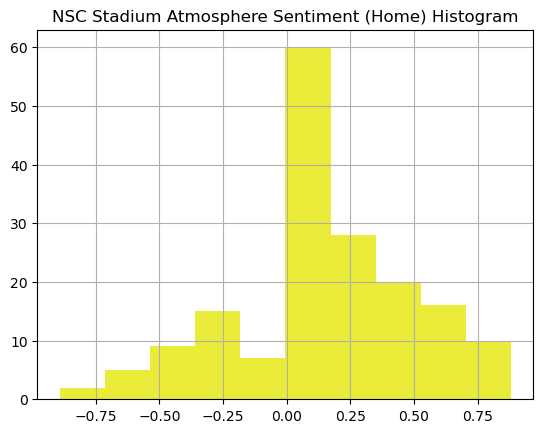

In [82]:
nsc_next_day[nsc_next_day["Venue"] == "Home"].loc[:, "stadium atmosphere"].hist(color=colors[0])
plt.title("NSC Stadium Atmosphere Sentiment (Home) Histogram")

Text(0.5, 1.0, 'NSC Stadium Atmosphere Sentiment (Away) Histogram')

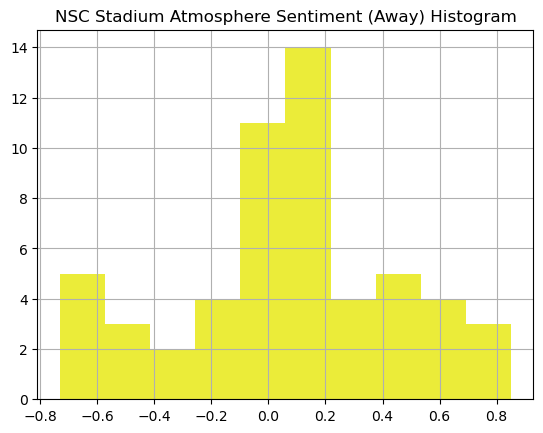

In [89]:
nsc_next_day[nsc_next_day["Venue"] == "Away"].loc[:, "stadium atmosphere"].hist(color=colors[0])
plt.title("NSC Stadium Atmosphere Sentiment (Away) Histogram")

In [74]:
# Initialize as a copy of the original
preds_next_day = preds.copy()

In [76]:
# Getting list of NSC Game Dates
preds_games = pd.read_csv("Games Data Cleaned/Preds Games.csv", index_col=0)
preds_games.rename(columns={"Date": "Game Date"}, inplace=True)
preds_games["Game Date"] = pd.to_datetime(preds_games["Game Date"]).dt.date

preds_game_dates = list(preds["Game Date"].dropna().unique())

In [77]:
# If there was a game played the day before but not the day of the post, get the previous day's game's data and set it as today's
for i in range(len(preds)):
    if ((preds_next_day.loc[i, "Post Date"] - pd.Timedelta(days=1)) in preds_game_dates) & pd.isnull(preds_next_day.loc[i, "Game Date"]):
        preds_next_day.loc[i, ["Game Date", "Venue", "Result", "Score", "Opponent", "Attendance", "Percent"]] = preds_next_day.loc[i-1, ["Game Date", "Venue", "Result", "Score", "Opponent","Attendance", "Percent"]]

In [78]:
with pd.option_context("display.max_columns", None):
    display(preds_next_day.loc[155:185,:])

,id,Title,Content,Author,Post Date,team performance,coaching and management,stadium atmosphere,stadium amenities,pricing,media coverage,miscellaneous,Game Date,Venue,Score,Opponent,Result,Attendance,Percent
155,yf4p7k,Looking for tickets to December 10th game agai...,Hey guys! So I am looking for two tickets (sea...,megmarie22502,2022-10-27,NaN,NaN,0.38,NaN,0.07,NaN,NaN,2022-10-27,Home,6.0,2.0,W,17159.0,0.962745
156,yfa9f0,Televised?,Last year my dad was able to watch most Preds ...,SpecialEd115,2022-10-28,NaN,NaN,NaN,NaN,NaN,0.06,-0.37,2022-10-27,Home,6.0,2.0,W,17159.0,0.962745
157,ygxw4s,Prokop Norfolk Admirals City Series Jersey ava...,<NA>,pineconekingpin,2022-10-29,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2022-10-29,Home,0.0,3.0,L,17159.0,0.962745
158,ygzj4b,Bally sports south?,What gives? Preds site says tonight’s game sh...,SpecialEd115,2022-10-30,NaN,NaN,NaN,NaN,NaN,0.11,-0.75,2022-10-29,Home,0.0,3.0,L,17159.0,0.962745
159,yjgmn3,This Predator mashup is really taking flight t...,<NA>,mleyd001,2022-11-01,NaN,NaN,NaN,0.00,NaN,NaN,NaN,2022-11-01,Away,4.0,7.0,L,16812.0,0.000000
160,yk48kd,Jersey question,How long til we see someone with a Bedard jers...,kjframe1223,2022-11-02,NaN,NaN,NaN,NaN,NaN,NaN,0.50,2022-11-01,Away,4.0,7.0,L,16812.0,0.000000
161,yk9kvp,Preds be like,"Win the lottery, pick Bedard, send him to the ...",obsoleteXeo,2022-11-02,-0.44,-0.11,NaN,NaN,NaN,NaN,0.12,2022-11-01,Away,4.0,7.0,L,16812.0,0.000000
162,yl9wng,Sat. Nov 12 game vs Rangers,Why the heck are tickets so expensive for this...,PadreFrancisco,2022-11-03,NaN,NaN,0.15,NaN,-0.17,NaN,NaN,2022-11-03,Away,4.0,1.0,W,16984.0,0.000000
163,ylcsu3,"You may no like it, but this is what peak GMin...",A bunch of fellow fans seem to be confused and...,hacksawl_goodman,2022-11-03,-0.14,-0.04,0.03,NaN,0.08,0.25,-0.01,2022-11-03,Away,4.0,1.0,W,16984.0,0.000000
164,yq9ob1,"I want a segment with Heinz called ""In Heinz-s...","Starts with an ""In Hindsight"" look back then e...",WeedLMT69,2022-11-09,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaT,<NA>,NaN,NaN,<NA>,NaN,NaN


Text(0.5, 1.0, 'Predators Stadium Atmosphere Sentiment (Home) Histogram')

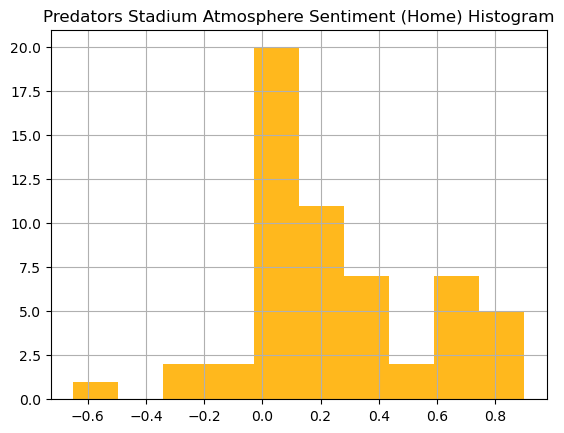

In [88]:
preds_next_day[preds_next_day["Venue"] == "Home"].loc[:, "stadium atmosphere"].hist(color=colors[1])
plt.title("Predators Stadium Atmosphere Sentiment (Home) Histogram")

Text(0.5, 1.0, 'Predators Stadium Atmosphere Sentiment (Away) Histogram')

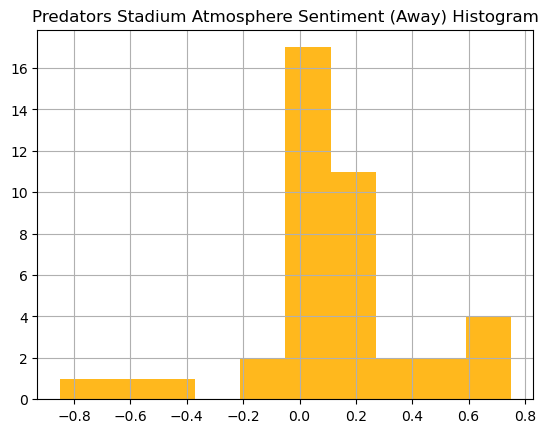

In [90]:
preds_next_day[preds_next_day["Venue"] == "Away"].loc[:, "stadium atmosphere"].hist(color=colors[1])
plt.title("Predators Stadium Atmosphere Sentiment (Away) Histogram")

In [91]:
# Initialize as a copy of the original
titans_next_day = titans.copy()

In [92]:
# Getting list of NSC Game Dates
titans_games = pd.read_csv("Games Data Cleaned/Titans Games.csv", index_col=0)
titans_games.rename(columns={"Date": "Game Date"}, inplace=True)
titans_games["Game Date"] = pd.to_datetime(titans_games["Game Date"]).dt.date

titans_game_dates = list(titans["Game Date"].dropna().unique())

In [95]:
# If there was a game played the day before but not the day of the post, get the previous day's game's data and set it as today's
for i in range(len(titans)):
    if ((titans_next_day.loc[i, "Post Date"] - pd.Timedelta(days=1)) in titans_game_dates) & pd.isnull(titans_next_day.loc[i, "Game Date"]):
        titans_next_day.loc[i, ["Game Date", "Venue", "Result", "Score", "Opponent", "Attendance", "Percent"]] = titans_next_day.loc[i-1, ["Game Date", "Venue", "Result", "Score", "Opponent","Attendance", "Percent"]]

In [96]:
with pd.option_context("display.max_columns", None):
    display(titans_next_day.loc[195:225,:])

,id,Title,Content,Author,Post Date,team performance,coaching and management,stadium atmosphere,stadium amenities,pricing,media coverage,miscellaneous,Game Date,Result,Venue,Score,Opponent,Attendance,Percent
195,x8pp7b,How do you feel about this season?,"For me, I’m feeling the letdown blues still fr...",Markosaurus,2022-09-08,-0.16,0.30,NaN,NaN,NaN,NaN,NaN,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN
196,x9w4jm,Found this and thought it was hilarious,<NA>,Zoosee12,2022-09-09,NaN,NaN,NaN,NaN,NaN,NaN,0.11,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN
197,xao9uy,Day until Titans football returns,<NA>,geegoj,2022-09-10,0.19,NaN,NaN,NaN,NaN,NaN,0.24,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN
198,xasfr0,Music to my ears,<NA>,PAPxDADDY,2022-09-10,NaN,NaN,0.10,NaN,NaN,NaN,0.38,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN
199,xaxexw,A place to give away or ask for game-day tickets.,Sometimes things come up and you can’t use you...,Sanivek,2022-09-10,NaN,NaN,NaN,NaN,NaN,NaN,0.43,NaT,<NA>,<NA>,NaN,NaN,NaN,NaN
200,xbdmsb,"Game day in the UK, tale as old as time.",<NA>,Splinunz,2022-09-11,NaN,NaN,0.69,NaN,NaN,NaN,0.03,2022-09-11,L,Home,20.0,21.0,67805.0,0.976187
201,xbq247,Wildly Unpopular Opinion,I'm enjoying seeing AJ Brown tear it up right ...,ApexIpex,2022-09-11,NaN,NaN,NaN,NaN,NaN,NaN,0.12,2022-09-11,L,Home,20.0,21.0,67805.0,0.976187
202,xc23v1,Week 1 Overreaction,See all subs below. It's week 1. Week 1 of 18....,shoe1113,2022-09-12,-0.13,-0.15,NaN,NaN,NaN,NaN,NaN,2022-09-11,L,Home,20.0,21.0,67805.0,0.976187
203,xcf1c0,Hi Titans fans! I am a Giants fan from NJ and ...,<NA>,HowIPlowedYourMother,2022-09-12,-0.18,-0.06,0.08,0.25,NaN,0.20,0.71,2022-09-11,L,Home,20.0,21.0,67805.0,0.976187
204,xch6co,Ran out of gas,The offense is what everyone who’s followed th...,allforit234,2022-09-12,0.05,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-11,L,Home,20.0,21.0,67805.0,0.976187


Text(0.5, 1.0, 'Titans Stadium Atmosphere Sentiment (Home) Histogram')

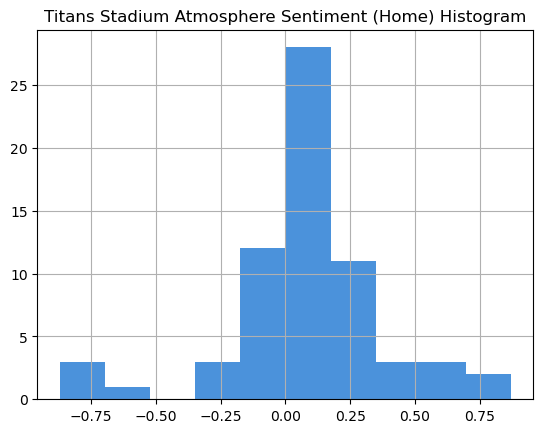

In [98]:
titans_next_day[titans_next_day["Venue"] == "Home"].loc[:, "stadium atmosphere"].hist(color=colors[2])
plt.title("Titans Stadium Atmosphere Sentiment (Home) Histogram")

Text(0.5, 1.0, 'Titans Stadium Atmosphere Sentiment (Away) Histogram')

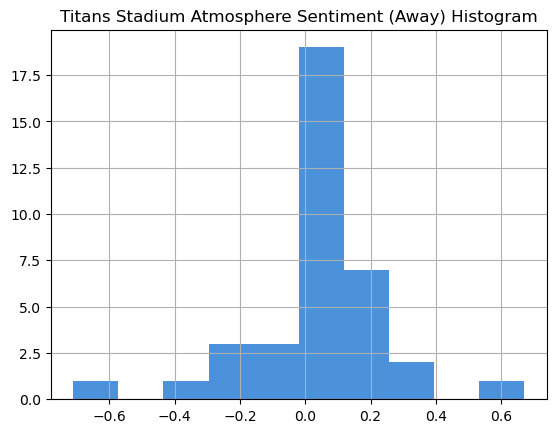

In [99]:
titans_next_day[titans_next_day["Venue"] == "Away"].loc[:, "stadium atmosphere"].hist(color=colors[2])
plt.title("Titans Stadium Atmosphere Sentiment (Away) Histogram")

## Win vs Loss

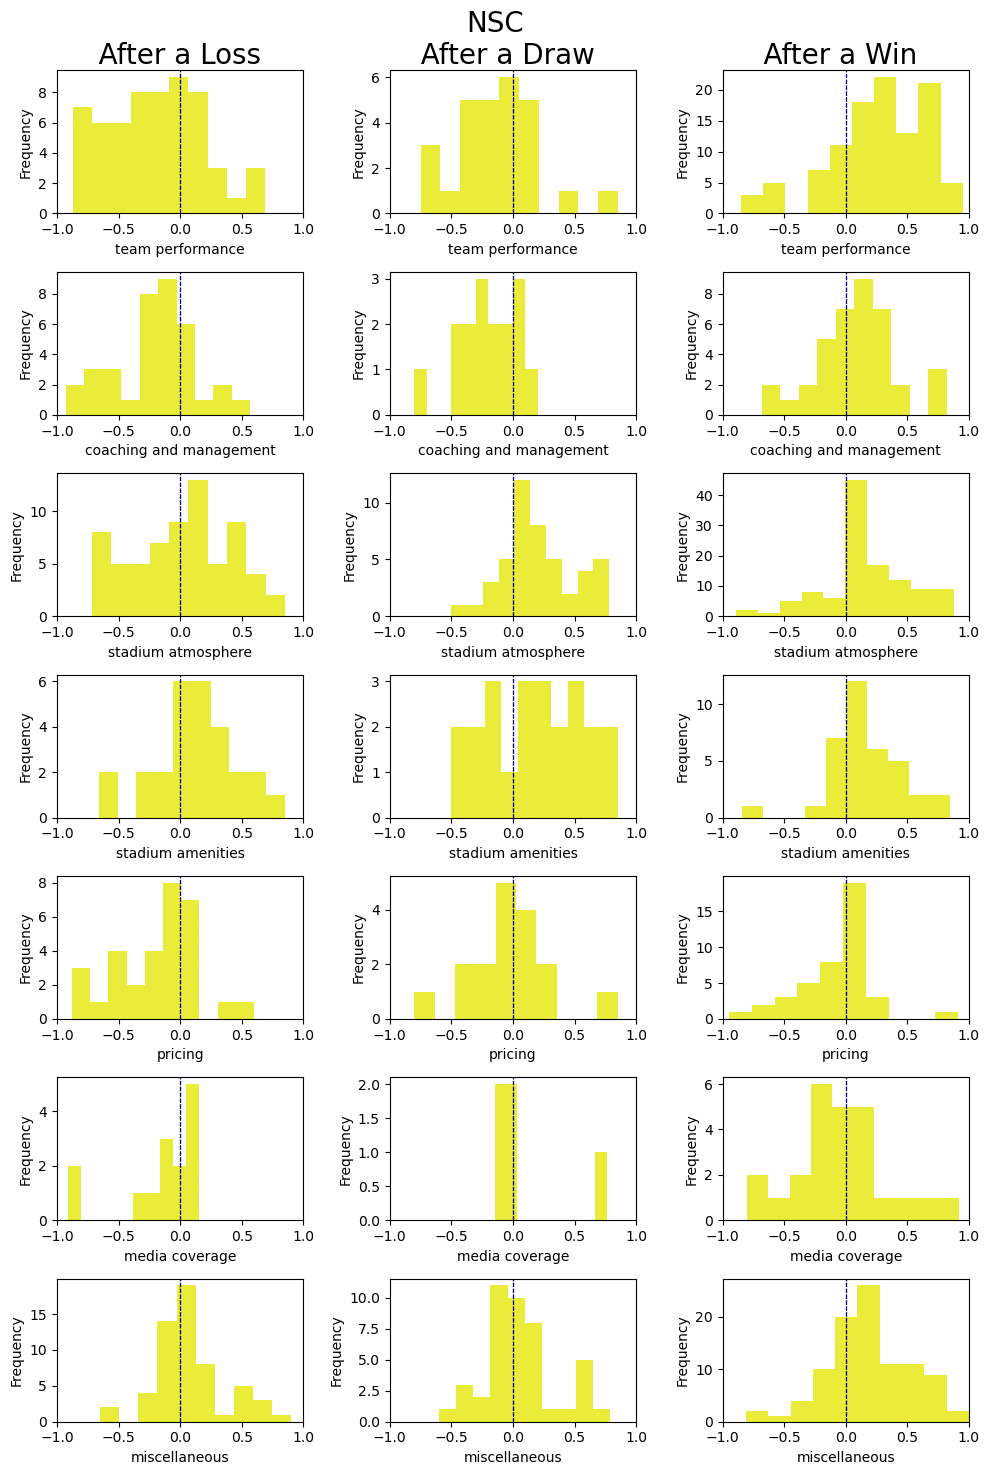

In [154]:
fig, axs = plt.subplots(num_aspects, 3, figsize=(10, 15))

for i, df in enumerate(team_dfs):
    for j in range(len(aspects)):
        ax = axs[j][0]
        ax.hist(nsc_next_day[nsc_next_day["Result"] == "L"].loc[1:,aspects[j]], bins=10, color=colors[0])
        ax.axvline(x=0, color='navy', linestyle='dashed', linewidth=0.8)
        ax.set_title(f'')
        ax.set_xlabel(f'{aspects[j]}')
        ax.set_ylabel('Frequency')
        ax.set_xlim(-1, 1)
        
        ax1 = axs[j][1]
        ax1.hist(nsc_next_day[nsc_next_day["Result"] == "D"].loc[1:,aspects[j]], bins=10, color=colors[0])
        ax1.axvline(x=0, color='navy', linestyle='dashed', linewidth=0.8)
        ax1.set_title(f'')
        ax1.set_xlabel(f'{aspects[j]}')
        ax1.set_ylabel('Frequency')
        ax1.set_xlim(-1, 1)
        
        ax2 = axs[j][2]
        ax2.hist(nsc_next_day[nsc_next_day["Result"] == "W"].loc[1:,aspects[j]], bins=10, color=colors[0])
        ax2.axvline(x=0, color='navy', linestyle='dashed', linewidth=0.8)
        ax2.set_title(f'')
        ax2.set_xlabel(f'{aspects[j]}')
        ax2.set_ylabel('Frequency')
        ax2.set_xlim(-1, 1)

plt.suptitle("NSC\n   After a Loss                  After a Draw                   After a Win", size=20)
plt.tight_layout()
plt.show()


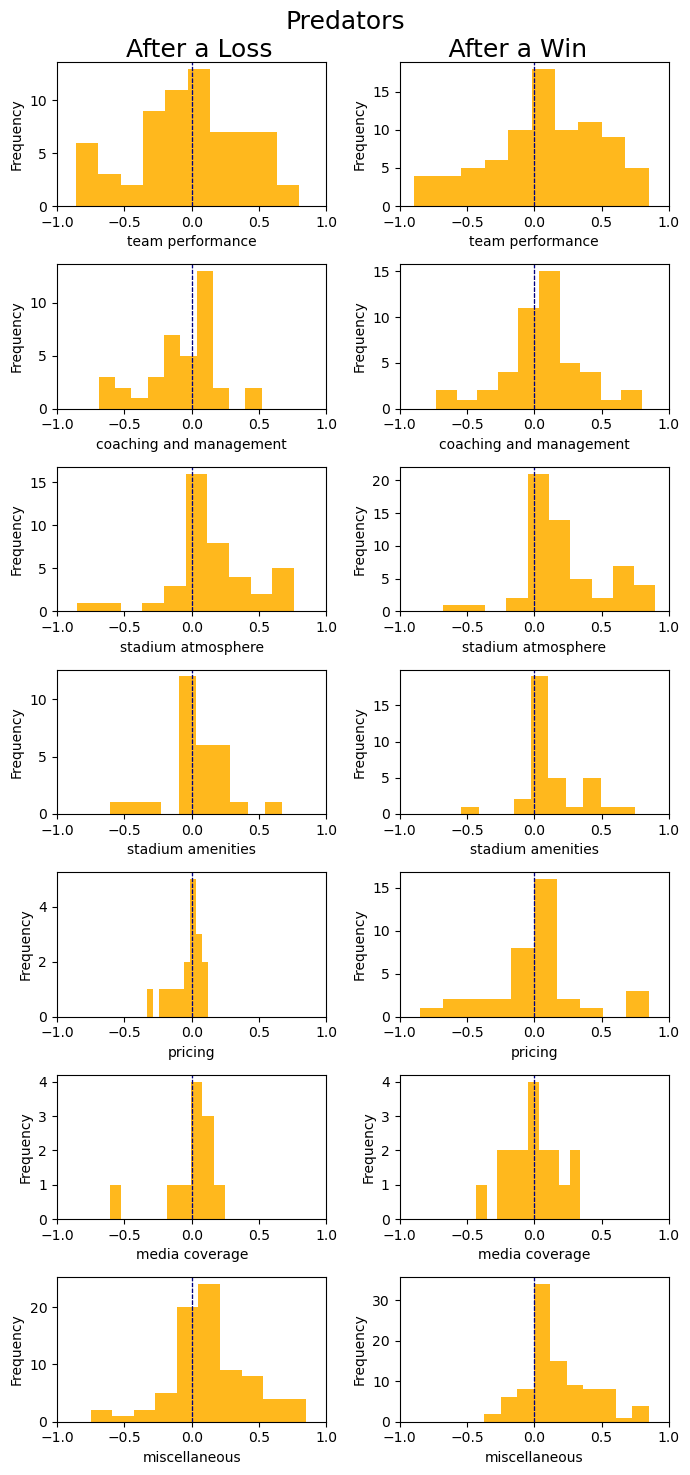

In [155]:
fig, axs = plt.subplots(num_aspects, 2, figsize=(7, 15))

for i, df in enumerate(team_dfs):
    for j in range(len(aspects)):
        ax = axs[j][0]
        ax.hist(preds_next_day[preds_next_day["Result"] == "L"].loc[1:,aspects[j]], bins=10, color=colors[1])
        ax.axvline(x=0, color='navy', linestyle='dashed', linewidth=0.8)
        ax.set_title(f'')
        ax.set_xlabel(f'{aspects[j]}')
        ax.set_ylabel('Frequency')
        ax.set_xlim(-1, 1)
        
        ax2 = axs[j][1]
        ax2.hist(preds_next_day[preds_next_day["Result"] == "W"].loc[1:,aspects[j]], bins=10, color=colors[1])
        ax2.axvline(x=0, color='navy', linestyle='dashed', linewidth=0.8)
        ax2.set_title(f'')
        ax2.set_xlabel(f'{aspects[j]}')
        ax2.set_ylabel('Frequency')
        ax2.set_xlim(-1, 1)

plt.suptitle("Predators\n   After a Loss                      After a Win", size=18)
plt.tight_layout()
plt.show()


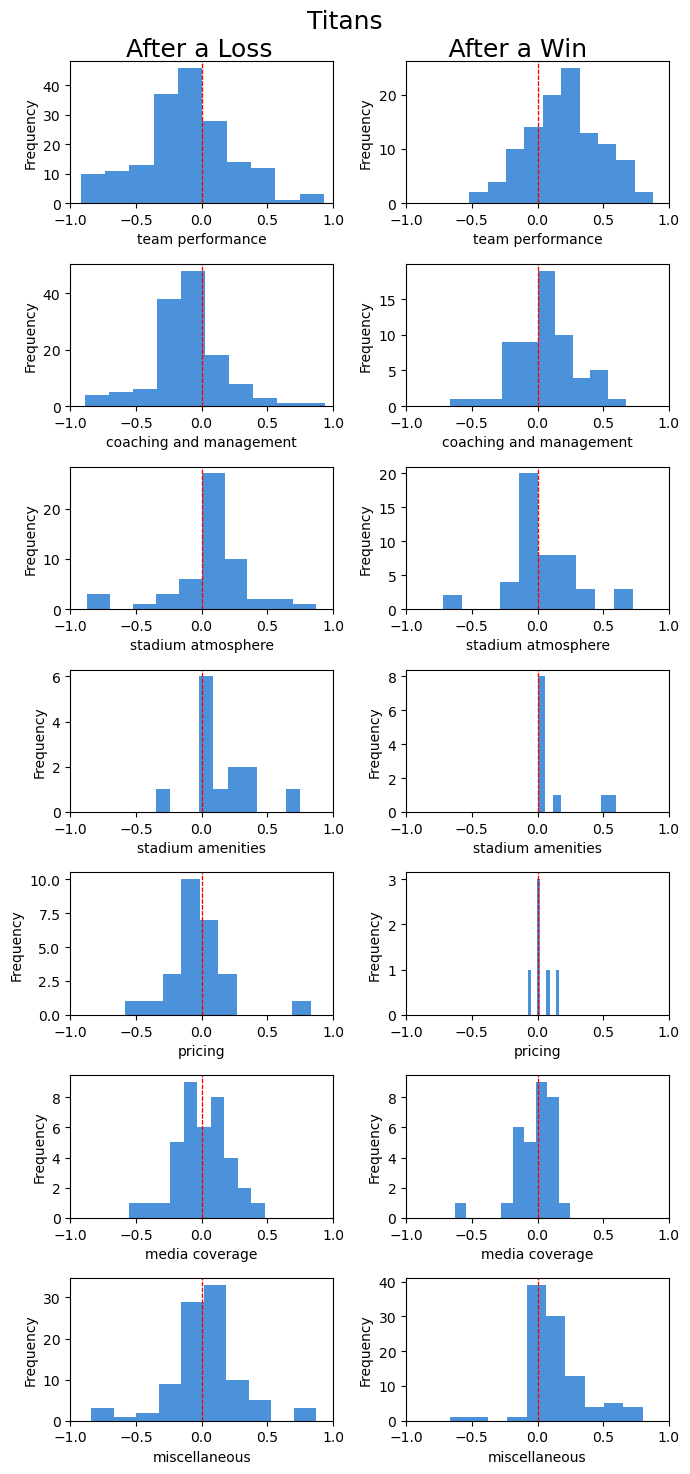

In [157]:
fig, axs = plt.subplots(num_aspects, 2, figsize=(7, 15))

for i, df in enumerate(team_dfs):
    for j in range(len(aspects)):
        ax = axs[j][0]
        ax.hist(titans_next_day[titans_next_day["Result"] == "L"].loc[1:,aspects[j]], bins=10, color=colors[2])
        ax.axvline(x=0, color='red', linestyle='dashed', linewidth=0.8)
        ax.set_title(f'')
        ax.set_xlabel(f'{aspects[j]}')
        ax.set_ylabel('Frequency')
        ax.set_xlim(-1, 1)
        
        ax2 = axs[j][1]
        ax2.hist(titans_next_day[titans_next_day["Result"] == "W"].loc[1:,aspects[j]], bins=10, color=colors[2])
        ax2.axvline(x=0, color='red', linestyle='dashed', linewidth=0.8)
        ax2.set_title(f'')
        ax2.set_xlabel(f'{aspects[j]}')
        ax2.set_ylabel('Frequency')
        ax2.set_xlim(-1, 1)

plt.suptitle("Titans\n   After a Loss                      After a Win", size=18)
plt.tight_layout()
plt.show()


## Playoff Game Comparison

In [162]:
nsc_games.loc[34,:]

Game Date      2022-10-15
Comp                  MLS
Round         First Round
Venue                Away
Result                  L
Score                   0
Opponent                1
xG                    0.8
xGA                   1.2
Attendance          22280
Percent               0.0
Name: 34, dtype: object

In [163]:
with pd.option_context("display.max_rows", None):
    display(preds_games)

,Game Date,Venue,Score,Opponent,Result,Attendance,Percent
0,2022-10-07,Away,4,1,W,16648,0.000000
1,2022-10-08,Away,3,2,W,17023,0.000000
2,2022-10-13,Home,1,4,L,17692,0.992650
3,2022-10-15,Away,1,5,L,18532,0.000000
4,2022-10-18,Home,3,4,L,17159,0.962745
5,2022-10-20,Away,3,5,L,14691,0.000000
6,2022-10-22,Home,1,3,L,17470,0.980194
7,2022-10-27,Home,6,2,W,17159,0.962745
8,2022-10-29,Home,0,3,L,17159,0.962745
9,2022-11-01,Away,4,7,L,16812,0.000000
